# Курсовой проект - Миркин

__Группа__ - Никифоров, Попов

In [1]:
# Подключаю свой Google Drive, там лежит датасет
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Импортирую датасет
import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/november_weather.csv', delimiter='\t')

In [0]:
# Загрузить датасет
import io
from google.colab import files

uploaded = files.upload()

Saving november_weather.csv to november_weather (2).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['november_weather.csv']), delimiter='\t')

# Задание 2, Кластер-анализ
1. Выберите не менее трех количественных признаков, объясните выбор и примените метод К-средних:
  * для K=5
  * для K=9
  * в обоих случаях сделайте порядка 10 случайных инициализаций и выберите то, которое доставляет минимум критерию метода
2. Проинтерпретируйте оба разбиения с помощью признаков таблицы данных путем сравнения внутрикластерных средних с общими средними. Объясните, какое из разбиений лучше с точки зрения интерпретации.

---

__Выбираем признаки__:
 * `avg_temp` - средняя температура в течении дня;
 * `pressure` - среднее атмосферное давление в течении дня;
 * `wind_speed` - сркдняя скорость ветра;

In [10]:
df_features = df[['avg_temp', 'pressure', 'wind_speed']].drop(df[df.pressure == '-'].index).drop(df[df.wind_speed > 45].index)
df_features.pressure = df_features.apply(lambda x: float(x.pressure), axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
import numpy as np
from random import choices
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statistics import mean, stdev

%matplotlib inline

__1.1 - kmeans для 5 кластеров__

In [12]:
kmeans_5 = KMeans(
    n_clusters = 5,       # 5 кластеров
    init = 'random',      # центры кластеров - случайно выбранные точки
    n_init = 10           # количество инициализаций алгоритма
)
kmeans_5.fit(df_features) # выполнение алгоритма

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

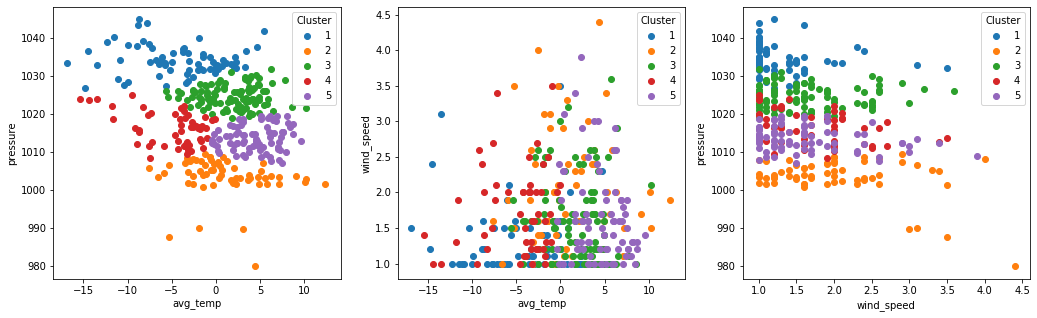

In [14]:
# Добавлю к исходному датасету созданные кластеры
df_features_5 = df_features
df_features['cluster'] = kmeans_5.labels_

# Визуализация
fig, graphs = plt.subplots(1, 3, figsize=(17.5, 5))

plt.axes(graphs[0])
for i in range(5):
    plt.scatter(
        df_features_5[df_features_5.cluster == i].avg_temp,
        df_features_5[df_features_5.cluster == i].pressure,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('pressure')
plt.legend(title='Cluster')

plt.axes(graphs[1])
for i in range(5):
    plt.scatter(
        df_features_5[df_features_5.cluster == i].avg_temp,
        df_features_5[df_features_5.cluster == i].wind_speed,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('wind_speed')
plt.legend(title='Cluster')

plt.axes(graphs[2])
for i in range(5):
    plt.scatter(
        df_features_5[df_features_5.cluster == i].wind_speed,
        df_features_5[df_features_5.cluster == i].pressure,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('wind_speed')
plt.ylabel('pressure')
plt.legend(title='Cluster')

fig.savefig('gdrive/My Drive/Colab Notebooks/task2_five_clusters.png')
print()

__1.2 - kmeans для 9 кластеров__

In [15]:
kmeans_9 = KMeans(
    n_clusters = 9,       # 9 кластеров
    init = 'random',      # центры кластеров - случайно выбранные точки
    n_init = 10           # количество инициализаций алгоритма
)
kmeans_9.fit(df_features) # выполнение алгоритма

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

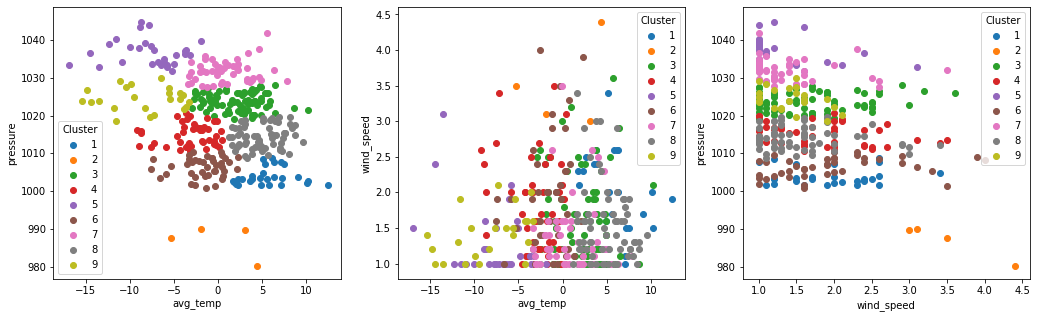

In [16]:
# Добавлю к исходному датасету созданные кластеры
df_features_9 = df_features
df_features['cluster'] = kmeans_9.labels_

# Визуализация
fig, graphs = plt.subplots(1, 3, figsize=(17.5, 5))

plt.axes(graphs[0])
for i in range(9):
    plt.scatter(
        df_features_9[df_features_9.cluster == i].avg_temp,
        df_features_9[df_features_9.cluster == i].pressure,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('pressure')
plt.legend(title='Cluster')

plt.axes(graphs[1])
for i in range(9):
    plt.scatter(
        df_features_9[df_features_9.cluster == i].avg_temp,
        df_features_9[df_features_9.cluster == i].wind_speed,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('wind_speed')
plt.legend(title='Cluster')

plt.axes(graphs[2])
for i in range(9):
    plt.scatter(
        df_features_9[df_features_9.cluster == i].wind_speed,
        df_features_9[df_features_9.cluster == i].pressure,
        label=i+1,
        cmap='rainbow'
    )
plt.xlabel('wind_speed')
plt.ylabel('pressure')
plt.legend(title='Cluster')

fig.savefig('gdrive/My Drive/Colab Notebooks/task2_nine_clusters.png')
print()

__2 - Проинтерпретируйте оба разбиения с помощью признаков таблицы данных путем сравнения внутрикластерных средних с общими средними. Объясните, какое из разбиений лучше с точки зрения интерпретации__

In [18]:
metrics_5cluster = pd.DataFrame(columns=['cluster', 'avg_temperature', 'avg_pressure', 'avg_wind'])
metrics_5cluster = metrics_5cluster.append(
    pd.Series(
        {
            'cluster': 'All data',
            'avg_temperature': mean(df_features_5.avg_temp),
            'avg_pressure': mean(df_features_5.pressure),
            'avg_wind': mean(df_features_5.wind_speed)
        }), ignore_index=True)

for i in range(5):
    metrics_5cluster = metrics_5cluster.append(
    pd.Series(
        {
            'cluster': f'Cluster #{i}',
            'avg_temperature': mean(df_features_5[df_features_5.cluster == i].avg_temp),
            'avg_pressure': mean(df_features_5[df_features_5.cluster == i].pressure),
            'avg_wind': mean(df_features_5[df_features_5.cluster == i].wind_speed)
        }), ignore_index=True)
    
metrics_5cluster = metrics_5cluster.set_index('cluster')
metrics_5cluster

,avg_temperature,avg_pressure,avg_wind
cluster,,,
All data,0.186376,1019.381471,1.645504
Cluster #0,5.559259,1003.914815,1.929630
Cluster #1,0.075000,986.850000,3.500000
Cluster #2,2.156627,1023.771084,1.603614
Cluster #3,-3.089130,1015.043478,1.819565
Cluster #4,-7.672414,1036.734483,1.310345


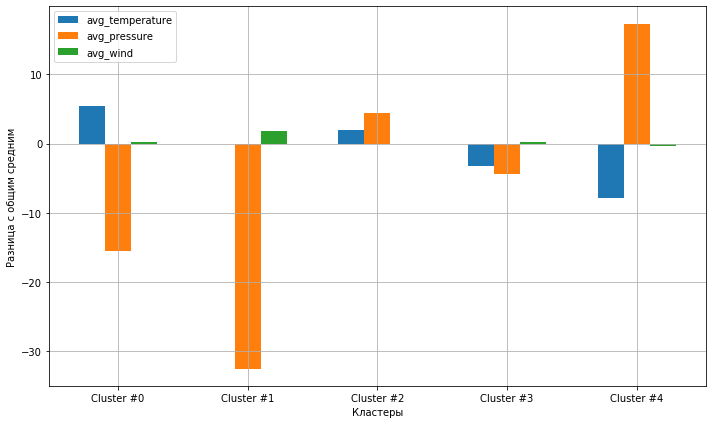

In [49]:
# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

metrics_5cluster_viz = metrics_5cluster[metrics_5cluster.index != 'All data']

plt.bar(index, metrics_5cluster_viz.avg_temperature - [metrics_5cluster.avg_temperature['All data']]*5, bar_width, label='avg_temperature')
plt.bar(index + bar_width, metrics_5cluster_viz.avg_pressure - [metrics_5cluster.avg_pressure['All data']]*5, bar_width, label='avg_pressure')
plt.bar(index + 2*bar_width, metrics_5cluster_viz.avg_wind - [metrics_5cluster.avg_wind['All data']]*5, bar_width, label='avg_wind')

plt.xlabel('Кластеры')
plt.ylabel('Разница с общим средним')
plt.xticks(index + bar_width, metrics_5cluster_viz.index)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [19]:
metrics_9cluster = pd.DataFrame(columns=['cluster', 'avg_temperature', 'avg_pressure', 'avg_wind'])
metrics_9cluster = metrics_9cluster.append(
    pd.Series(
        {
            'cluster': 'All data',
            'avg_temperature': mean(df_features_9.avg_temp),
            'avg_pressure': mean(df_features_9.pressure),
            'avg_wind': mean(df_features_9.wind_speed)
        }), ignore_index=True)

for i in range(9):
    metrics_9cluster = metrics_9cluster.append(
    pd.Series(
        {
            'cluster': f'Cluster #{i}',
            'avg_temperature': mean(df_features_9[df_features_9.cluster == i].avg_temp),
            'avg_pressure': mean(df_features_9[df_features_9.cluster == i].pressure),
            'avg_wind': mean(df_features_9[df_features_9.cluster == i].wind_speed)
        }), ignore_index=True)
    
metrics_9cluster = metrics_9cluster.set_index('cluster')
metrics_9cluster

,avg_temperature,avg_pressure,avg_wind
cluster,,,
All data,0.186376,1019.381471,1.645504
Cluster #0,5.559259,1003.914815,1.929630
Cluster #1,0.075000,986.850000,3.500000
Cluster #2,2.156627,1023.771084,1.603614
Cluster #3,-3.089130,1015.043478,1.819565
Cluster #4,-7.672414,1036.734483,1.310345
Cluster #5,-1.665854,1006.353659,1.965854
Cluster #6,0.952000,1031.764000,1.380000
Cluster #7,4.943750,1014.351562,1.575000


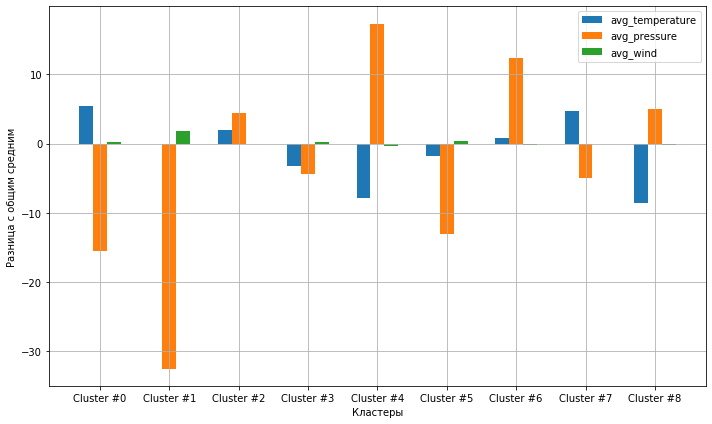

In [52]:
# data to plot
n_groups = 9

# create plot
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

metrics_9cluster_viz = metrics_9cluster[metrics_9cluster.index != 'All data']

plt.bar(index, metrics_9cluster_viz.avg_temperature - [metrics_9cluster.avg_temperature['All data']]*9, bar_width, label='avg_temperature')
plt.bar(index + bar_width, metrics_9cluster_viz.avg_pressure - [metrics_9cluster.avg_pressure['All data']]*9, bar_width, label='avg_pressure')
plt.bar(index + 2*bar_width, metrics_9cluster_viz.avg_wind - [metrics_9cluster.avg_wind['All data']]*9, bar_width, label='avg_wind')

plt.xlabel('Кластеры')
plt.ylabel('Разница с общим средним')
plt.xticks(index + bar_width, metrics_9cluster_viz.index)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

__Вывод__: *yet to do*

# Задание 3 - Бутстреп

Для одного из полученных в д.з. 2 разбиений
 * Найдите 95% доверительный интервал для среднего значения какого-либо признака на всем множестве объектов, используя бутстрэп
 * Сравните средние по какому-либо признаку в двух кластерах, используя бутстрэп
 * Для одного из кластеров сравните среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп
 
**Примечание**: каждое применение бутстрэпа должно быть обоими методами, с опорой и без

__1 - Найдите 95% доверительный интервал для среднего значения какого-либо признака на всем множестве объектов, используя бутстрэп__

Анализировать будем признак `avg_temp`

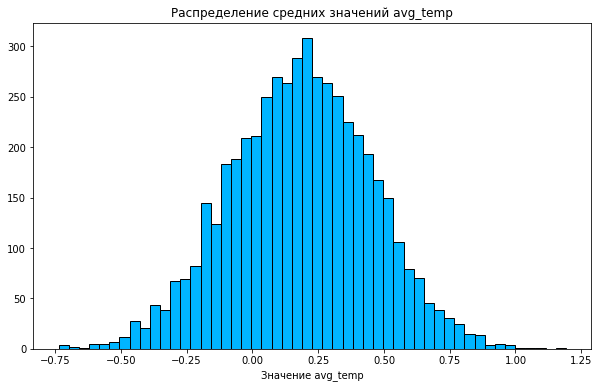

In [59]:
from random import choices
from statistics import mean

# Список средних
means = []

# Количество экспериментов
bootstrap_iters = 5000
# Количество выбираемых значений для эксперимента
bootstrap_choices = len(df_features)

for i in range(bootstrap_iters):
    # Добавляем в список                                            
    means.append(
        # Среднее значение
        mean(
            choices(
                # Выбираем случайный элемент из значений признака                                                  
                df_features_5['avg_temp'].tolist(),
                # k-раз
                k=bootstrap_choices
            )
        ) 
    )

# Визуализация
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(means, bins=50, color='#00b5ff', edgecolor='black')
plt.xlabel('Значение avg_temp')
plt.title('Распределение средних значений avg_temp')

print()

Найдем 95% доверительный интервал способом "без опоры"

In [60]:
# Сортируем список со средними
means_ordered = sorted(means)
# Отсекаем 2.5% значений снизу и берем наименьший оставшийся
left = means_ordered[int(len(means_ordered)*0.05/2 - 1)]
# Отсекаем 2.5% значений сверху и берем наибольший оставшийся
right = means_ordered[int(len(means_ordered) - (len(means_ordered)*0.05/2) - 1)]

print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{left}
  \tПравая:\t{right}
''')


  Границы 95% доверительного интервала:
  	Левая:	-0.35504087193460493
  	Правая:	0.7046321525885558



Найдем 95% доверительный интервал способом "c опорой"

In [61]:
from statistics import mean, stdev

print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{mean(means) - 1.96*stdev(means)}
  \tПравая:\t{mean(means) + 1.96*stdev(means)}
''')


  Границы 95% доверительного интервала:
  	Левая:	-0.34371803734203804
  	Правая:	0.707215476034136



__2 - Сравните средние по какому-либо признаку в двух кластерах, используя бутстрэп__

Будем использовать полученное ранее разбиение на 5 кластеров

Пусть сравниваемыми будут кластеры `3` и `4`

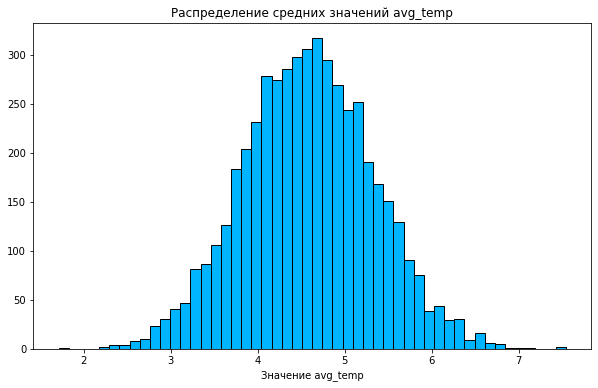

In [69]:
means = []
bootstrap_iters = 5000

for i in range(bootstrap_iters):
    means.append(
        # Из среднего значения признака в эксперименте на 3 кластере
        mean(
            choices(
                df_features_5[df_features_5.cluster == 3]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 3])
                )
            )
        # вычитаем
        -
        # среднее значение признака в эксперименте на 4 кластере
        mean(
            choices(
                df_features_5[df_features_5.cluster == 4]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 4])
                )
            )
    )
  
# Визуализация
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(means, bins=50, color='#00b5ff', edgecolor='black')
plt.xlabel('Значение avg_temp')
plt.title('Распределение средних значений avg_temp')

print()

0 не попадает в это распределение - средние значения признака avg_temp в кластерах `3` и `4` сильно различаются.

Рассмотрим распределения по-отдельности и расчитаем 95% доверительный интервал для полученного выше распеделения.

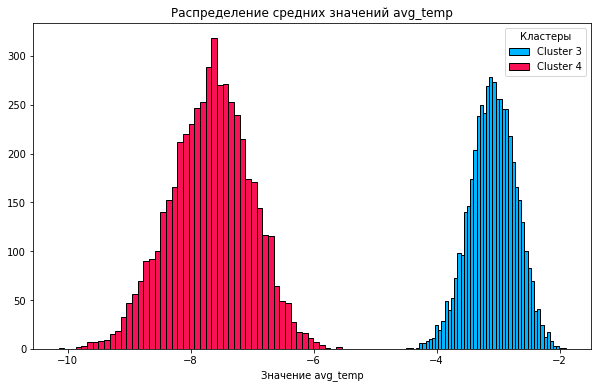

In [66]:
means_cluster3 = []
means_cluster4 = []

bootstrap_iters = 5000

for i in range(bootstrap_iters):
    means_cluster3.append(
        mean(
            choices(
                df_features_5[df_features_5.cluster == 3]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 3])
                )
            )
    )
    means_cluster4.append(
        mean(
            choices(
                df_features_5[df_features_5.cluster == 4]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 4])
                )
            )
    )
    
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(means_cluster3, bins=50, color='#00b5ff', label='Cluster 3', edgecolor='black')
plt.hist(means_cluster4, bins=50, color='#f91155', label='Cluster 4', edgecolor='black')
plt.legend(title='Кластеры')
plt.xlabel('Значение avg_temp')
plt.title('Распределение средних значений avg_temp')

print()

Найдем 95% доверительный интервал способом "без опоры"

In [70]:
means_ordered = sorted(means)                                                   # Сортируем массив со средними
left = means_ordered[int(len(means_ordered)*0.05/2 - 1)]                        # Отсекаем 2.5% значений снизу и берем наименьший оставшийся
right = means_ordered[int(len(means_ordered) - (len(means_ordered)*0.05/2) - 1)]# Отсекаем 2.5% значений сверху и берем наибольший оставшийся
print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{left}
  \tПравая:\t{right}
''')


  Границы 95% доверительного интервала:
  	Левая:	3.112893553223388
  	Правая:	6.068665667166417



Найдем 95% доверительный интервал способом "c опорой"

In [71]:
print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{mean(means) - 1.96*stdev(means)}
  \tПравая:\t{mean(means) + 1.96*stdev(means)}
''')


  Границы 95% доверительного интервала:
  	Левая:	3.1109550134891464
  	Правая:	6.043845406300958



__3 - Для одного из кластеров сравните среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп__

Будем использовать полученное ранее разбиение на 5 кластеров

Сравнивать с выборкой будем значения признака на кластере `1`

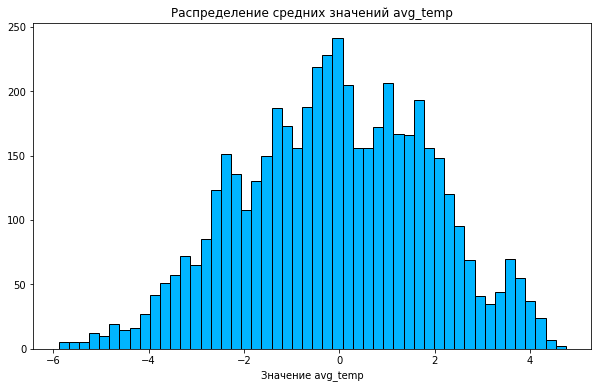

In [73]:
means = []

bootstrap_iters = 5000

for i in range(bootstrap_iters):
    means.append(
        mean(
            choices(
                df_features_5[df_features_5.cluster == 1]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 1])
                )
            )
        -
        mean(
            choices(
                df_features_5['avg_temp'].tolist(),
                k=len(df_features_5)
                )
            )
    )
    
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(means, bins=50, color='#00b5ff', edgecolor='black')
plt.xlabel('Значение avg_temp')
plt.title('Распределение средних значений avg_temp')

print()

0 попадает в это распределение - средние значения признака в кластере `1` и на всей выборке похожи.

Рассмотрим распределения по-отдельности и расчитаем 95% доверительный интервал для полученного выше распеделения.

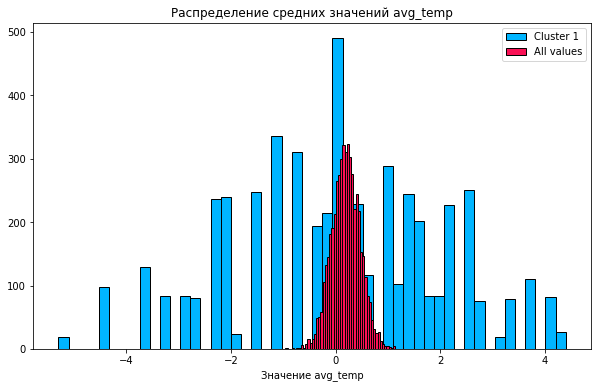

In [75]:
means_cluster1 = []                                                             # Принцип аналогичен используемому выше
means_allvalues = []

bootstrap_iters = 5000

for i in range(bootstrap_iters):
    means_cluster1.append(
        mean(
            choices(
                df_features_5[df_features_5.cluster == 1]['avg_temp'].tolist(),
                k=len(df_features_5[df_features_5.cluster == 1])
                )
            )
    )
    means_allvalues.append(
        mean(
            choices(
                df_features_5['avg_temp'].tolist(),
                k=len(df_features_5)
                )
            )
    )
    
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(means_cluster1, bins=50, color='#00b5ff', label='Cluster 1', edgecolor='black')
plt.hist(means_allvalues, bins=50, color='#f91155', label='All values', edgecolor='black')
plt.legend()
plt.xlabel('Значение avg_temp')
plt.title('Распределение средних значений avg_temp')

print()

Найдем 95% доверительный интервал способом "без опоры"

In [76]:
means_ordered = sorted(means)                                                   # Сортируем массив со средними
left = means_ordered[int(len(means_ordered)*0.05/2 - 1)]                        # Отсекаем 2.5% значений снизу и берем наименьший оставшийся
right = means_ordered[int(len(means_ordered) - (len(means_ordered)*0.05/2) - 1)]# Отсекаем 2.5% значений сверху и берем наибольший оставшийся
print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{left}
  \tПравая:\t{right}
''')


  Границы 95% доверительного интервала:
  	Левая:	-3.8915531335149858
  	Правая:	3.684264305177112



Найдем 95% доверительный интервал способом "c опорой"

In [77]:
print(f'''
  Границы 95% доверительного интервала:
  \tЛевая:\t{mean(means) - 1.96*stdev(means)}
  \tПравая:\t{mean(means) + 1.96*stdev(means)}
''')


  Границы 95% доверительного интервала:
  	Левая:	-3.9516607523396794
  	Правая:	3.747105384492268



# Задание 4 - Таблица сопряженности

1. Сформируйте три номинальных признака х1, х2 и х3 (один из них, но не больше, может быть взят из Вашей таблицы данных)
2. Сформируйте две таблицы сопряженности, х1 и х2, х1 и х3. Постройте также матрицы условных вероятностей (х1 от х2 и х1 от х3), а также таблицы коэффициентов Кетле. Прокомментируйте связи между категориями х1 и категориями х2 и х3.
3. Вычислите и визуализируйте среднее значение индекса Кетле на построенных таблицах сопряженности.
4. Прокомментируйте смысл значений индекса Кетле на двух-трех примерах.

__1 - Сформируйте три номинальных признака х1, х2 и х3 (один из них, но не больше, может быть взят из Вашей таблицы данных)__

В качестве первого номинального признака возьмем разбиение диапазона значений признака `avg_temp` на 4 равных по количеству объектов интревала


    Границы интервала: [-16.9; -2.9);	Значений в интервале: 93
    Границы интервала: [-2.9; 0.3);	Значений в интервале: 89
    Границы интервала: [0.3; 3.8);	Значений в интервале: 94
    Границы интервала: [3.8; 12.5);	Значений в интервале: 99



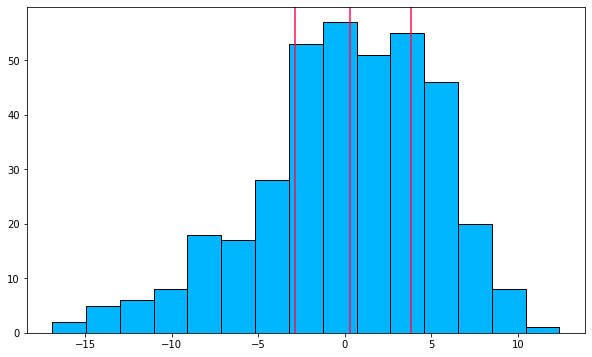

In [78]:
# Разбиение
temp_sorted = df['avg_temp'].sort_values()
average_temp_borders =[
    temp_sorted.iloc[0],
    temp_sorted.iloc[len(temp_sorted.index) // 4],
    temp_sorted.iloc[(len(temp_sorted.index) // 4) * 2],
    temp_sorted.iloc[(len(temp_sorted.index) // 4) * 3],
    temp_sorted.iloc[len(temp_sorted.index)-1] + 0.1
]
# Визуализация
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(df['avg_temp'], bins=15, color='#00b5ff', label='avg_temp', edgecolor='black')
plt.axvline(x=average_temp_borders[1], color='#f91155')
plt.axvline(x=average_temp_borders[2], color='#f91155')
plt.axvline(x=average_temp_borders[3], color='#f91155')
# Вывод
print(f'''
    Границы интервала: [{average_temp_borders[0]}; {average_temp_borders[1]});\tЗначений в интервале: {len(df[(df.avg_temp >= average_temp_borders[0]) & (df.avg_temp < average_temp_borders[1])])}
    Границы интервала: [{average_temp_borders[1]}; {average_temp_borders[2]});\tЗначений в интервале: {len(df[(df.avg_temp >= average_temp_borders[1]) & (df.avg_temp < average_temp_borders[2])])}
    Границы интервала: [{average_temp_borders[2]}; {average_temp_borders[3]});\tЗначений в интервале: {len(df[(df.avg_temp >= average_temp_borders[2]) & (df.avg_temp < average_temp_borders[3])])}
    Границы интервала: [{average_temp_borders[3]}; {average_temp_borders[4]});\tЗначений в интервале: {len(df[(df.avg_temp >= average_temp_borders[3]) & (df.avg_temp < average_temp_borders[4])])}
''')

Для выделения второго номинального признака рассмотрим распределение признака `snow_depth`

Рассмотрим распределение, и выберем для него границы интервалов
    Границы интервала: [0; 0.1);	Значений в интервале: 249
    Границы интервала: [0.1; 5);	Значений в интервале: 46
    Границы интервала: [5; 13);		Значений в интервале: 56
    Границы интервала: [13; 27);	Значений в интервале: 24




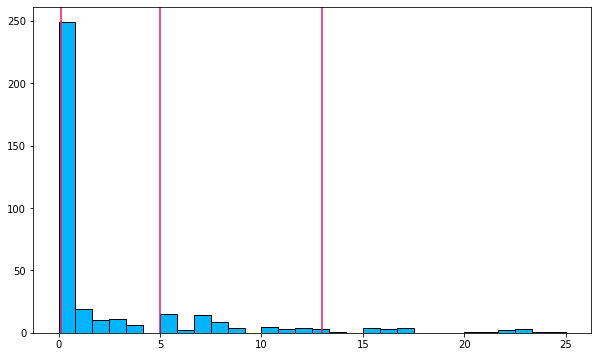

In [79]:
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(df['snow_depth'], bins=30, color='#00b5ff', label='snow_depth', edgecolor='black')

snow_depth_borders = [0, 0.1, 5, 13, 27]
print(f'''Рассмотрим распределение, и выберем для него границы интервалов
    Границы интервала: [{snow_depth_borders[0]}; {snow_depth_borders[1]});\tЗначений в интервале: {len(df[(df.snow_depth >= snow_depth_borders[0]) & (df.snow_depth < snow_depth_borders[1])])}
    Границы интервала: [{snow_depth_borders[1]}; {snow_depth_borders[2]});\tЗначений в интервале: {len(df[(df.snow_depth >= snow_depth_borders[1]) & (df.snow_depth < snow_depth_borders[2])])}
    Границы интервала: [{snow_depth_borders[2]}; {snow_depth_borders[3]});\t\tЗначений в интервале: {len(df[(df.snow_depth >= snow_depth_borders[2]) & (df.snow_depth < snow_depth_borders[3])])}
    Границы интервала: [{snow_depth_borders[3]}; {snow_depth_borders[4]});\tЗначений в интервале: {len(df[(df.snow_depth >= snow_depth_borders[3]) & (df.snow_depth < snow_depth_borders[4])])}
''')

plt.axvline(x=snow_depth_borders[1], color='#f91155')
plt.axvline(x=snow_depth_borders[2], color='#f91155')
plt.axvline(x=snow_depth_borders[3], color='#f91155')

print()

Для выделения третьего номинального признака рассмотрим распределение признака `downfall`

Рассмотрим распределение, и выберем для него границы интервалов
    Границы интервала: [0; 0.1);	Значений в интервале: 245
    Границы интервала: [0.1; 4);	Значений в интервале: 91
    Границы интервала: [4; 7);		Значений в интервале: 28
    Границы интервала: [7; 28);		Значений в интервале: 11




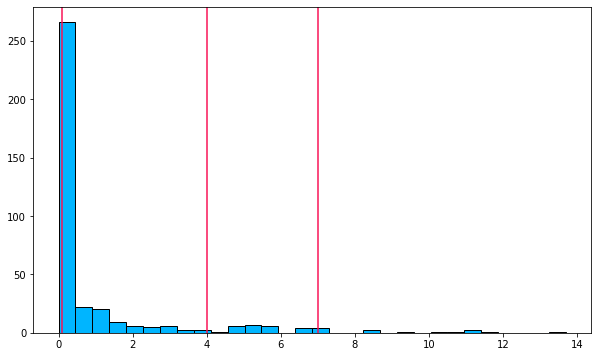

In [80]:
fig, graph = plt.subplots(figsize=(10, 6))
plt.hist(df['downfall'], bins=30, color='#00b5ff', label='downfall', edgecolor='black')

downfall_borders = [0, 0.1, 4, 7, 28]
print(f'''Рассмотрим распределение, и выберем для него границы интервалов
    Границы интервала: [{downfall_borders[0]}; {downfall_borders[1]});\tЗначений в интервале: {len(df[(df.downfall >= downfall_borders[0]) & (df.downfall < downfall_borders[1])])}
    Границы интервала: [{downfall_borders[1]}; {downfall_borders[2]});\tЗначений в интервале: {len(df[(df.downfall >= downfall_borders[1]) & (df.downfall < downfall_borders[2])])}
    Границы интервала: [{downfall_borders[2]}; {downfall_borders[3]});\t\tЗначений в интервале: {len(df[(df.downfall >= downfall_borders[2]) & (df.downfall < downfall_borders[3])])}
    Границы интервала: [{downfall_borders[3]}; {downfall_borders[4]});\t\tЗначений в интервале: {len(df[(df.downfall >= downfall_borders[3]) & (df.downfall < downfall_borders[4])])}
''')

plt.axvline(x=downfall_borders[1], color='#f91155')
plt.axvline(x=downfall_borders[2], color='#f91155')
plt.axvline(x=downfall_borders[3], color='#f91155')

print()

__2 - Сформируйте две таблицы сопряженности, х1 и х2, х1 и х3. Постройте также матрицы условных вероятностей (х1 от х2 и х1 от х3), а также таблицы коэффициентов Кетле. Прокомментируйте связи между категориями х1 и категориями х2 и х3__

In [0]:
# Таблица сопряженности x1(avg_temp) и x2(snow_depth)
t_s = np.arange(16).reshape(4, 4)
# Таблица сопряженности x1(avg_temp) и x3(downfall)
t_d = np.arange(16).reshape(4, 4)

for i in range(4):
    for j in range(4):
        t_s[j][i] = len(
            df[
                 (snow_depth_borders[i] <= df['snow_depth']) &
                 (df['snow_depth'] < snow_depth_borders[i+1]) &
                 (average_temp_borders[j] <= df['avg_temp']) &
                 (df['avg_temp'] < average_temp_borders[j+1])
            ].index
        )
        t_d[j][i] = len(
            df[
                 (downfall_borders[i] <= df['downfall']) &
                 (df['downfall'] < downfall_borders[i+1]) &
                 (average_temp_borders[j] <= df['avg_temp']) &
                 (df['avg_temp'] < average_temp_borders[j+1])
            ].index
        )

In [0]:
print(f'''
    Таблица сопряженности x1(avg_temp) и x2(snow_depth):
{t_s}

    Таблица сопряженности x1(avg_temp) и x3(downfall):
{t_d}
''')


    Таблица сопряженности x1(avg_temp) и x2(snow_depth):
[[32 12 31 18]
 [45 21 18  5]
 [73 13  7  1]
 [99  0  0  0]]

    Таблица сопряженности x1(avg_temp) и x3(downfall):
[[69 20  3  1]
 [54 21 10  4]
 [59 25  6  4]
 [63 25  9  2]]



In [0]:
conditional_probability_t_s = np.zeros((4, 4))
conditional_probability_t_d = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
      conditional_probability_t_s[j,i] = round(t_s[j,i] / sum(t_s[:,i]), 2)
      conditional_probability_t_d[j,i] = round(t_d[j,i] / sum(t_d[:,i]), 2)

In [83]:
print(f'''
    Таблица условных вероятностей x1(avg_temp) и x2(snow_depth):
{conditional_probability_t_s}

    Таблица условных вероятностей x1(avg_temp) и x3(downfall):
{conditional_probability_t_d}
''')


    Таблица условных вероятностей x1(avg_temp) и x2(snow_depth):
[[0.13 0.26 0.55 0.75]
 [0.18 0.46 0.32 0.21]
 [0.29 0.28 0.12 0.04]
 [0.4  0.   0.   0.  ]]

    Таблица условных вероятностей x1(avg_temp) и x3(downfall):
[[0.28 0.22 0.11 0.09]
 [0.22 0.23 0.36 0.36]
 [0.24 0.27 0.21 0.36]
 [0.26 0.27 0.32 0.18]]



In [0]:
probability_t_s = np.zeros((4, 4))
probability_t_d = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
      probability_t_s[j,i] = round(t_s[j,i] / t_s.sum(), 2)
      probability_t_d[j,i] = round(t_d[j,i] / t_d.sum(), 2)

ketle_t_s = np.zeros((4, 4))
ketle_t_d = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
      ketle_t_s[j,i] = round((probability_t_s[j,i] / ( sum(probability_t_s[:,i]) * sum(probability_t_s[j,:] )) - 1)*100, 2)
      ketle_t_d[j,i] = round((probability_t_d[j,i] / ( sum(probability_t_d[:,i]) * sum(probability_t_d[j,:] )) - 1)*100, 2)

In [85]:
print(f'''
    Таблица коэффициентов Кетле x1(avg_temp) и x2(snow_depth):
{ketle_t_s}

    Таблица коэффициентов Кетле x1(avg_temp) и x3(downfall):
{ketle_t_d}
''')


    Таблица коэффициентов Кетле x1(avg_temp) и x2(snow_depth):
[[ -45.45    0.    113.33  233.33]
 [ -24.24  108.33   38.89  -30.56]
 [  19.95    4.17  -44.44 -100.  ]
 [  51.52 -100.   -100.   -100.  ]]

    Таблица коэффициентов Кетле x1(avg_temp) и x3(downfall):
[[  15.38  -16.67  -47.92 -100.  ]
 [ -10.26   -0.     56.25   38.89]
 [  -5.33    7.69   -3.85   28.21]
 [  -3.13    3.7    -7.41   23.46]]



Как видно из таблиц, средняя глубина глубина снега растёт с уменьшением средней температуры, а осадки наиболее вероятны при температуре около 0.

__3 - Вычислите и визуализируйте среднее значение индекса Кетле на построенных таблицах сопряженности__

In [86]:
ind_ketle_t_s = np.zeros((4, 4))
ind_ketle_t_d = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
      ind_ketle_t_s[j,i] = probability_t_s[j,i]*ketle_t_s[j,i]/100
      ind_ketle_t_d[j,i] = probability_t_d[j,i]*ketle_t_s[j,i]/100

print(f'''
avg ketle t-s: {ind_ketle_t_s.sum()}
avg ketle t-d: {ind_ketle_t_d.sum()}
''')


avg ketle t-s: 0.382943
avg ketle t-d: -0.027268999999999988



In [87]:
print(f'''
{avg_ketle_t_s}

{avg_ketle_t_d}
''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



NameError: ignored

__4 - Прокомментируйте смысл значений индекса Кетле на двух-трех примерах__

Для температуры больше 3.5 градусов и глубины снега больше 0 значение индекса Кетле -100, т.е. такого не бывает, что вполне логично, так как снег при такой температуре просто растает. Для низкой температуры и глубокого снега значение индекса Кетле очень высокое, т.е. эти события почти всегда происходят одновременно.

Для большого количества осадков и низкой температуры индекс Кетле очень низкий, а для температуры около 0 и осадков индекс Кетле высокий, т.е. осадки наиболее вероятны при температуре у 0, и крайне маловероятны при морозах.

# Задание 5: МГК/SVD

 1. Выберите в Ваших данных 3-6 признаков, более или менее относящихся к одному и тому же аспекту данных; откомментируйте
 2. Визуализируйте Ваши данные дважды, один раз с использованием стандартизации на размах, второй – путем z-scoring. Выберите какую-либо группу объектов и выделите ее на визуализациях цветом или формой «точек»
 3. Примените традиционный метод МГК для визуализации (для какого-либо способа нормализации) и убедитесь, что получено то же самое, что и выше. Если нет – объясните, в чем дело
 4. Постарайтесь проинтерпретировать полученные компоненты

__1 - Выберите в Ваших данных 3-6 признаков, более или менее относящихся к одному и тому же аспекту данных; откомментируйте__

In [0]:
av_t = df[['avg_temp', 'min_temp', 'max_temp']].to_numpy()
amplitude_scoring = pd.DataFrame((av_t - av_t.mean(axis = 0))/(av_t.max(axis = 0) - av_t.min(axis = 0)), columns = ['avg_temp', 'min_temp', 'max_temp'])
amplitude_scoring['snow_depth'] = df['snow_depth'].to_numpy()
z_scoring = pd.DataFrame((av_t - av_t.mean(axis = 0))/np.sqrt( ((av_t - av_t.mean(axis = 0))*(av_t - av_t.mean(axis = 0))).mean(axis = 0) ), columns = ['avg_temp', 'min_temp', 'max_temp'])
z_scoring['snow_depth'] = df['snow_depth'].to_numpy()

__2 - Визуализируйте Ваши данные дважды, один раз с использованием стандартизации на размах, второй – путем z-scoring. Выберите какую-либо группу объектов и выделите ее на визуализациях цветом или формой «точек»__

Визуализируем данные с использованием стандартизации на размах:



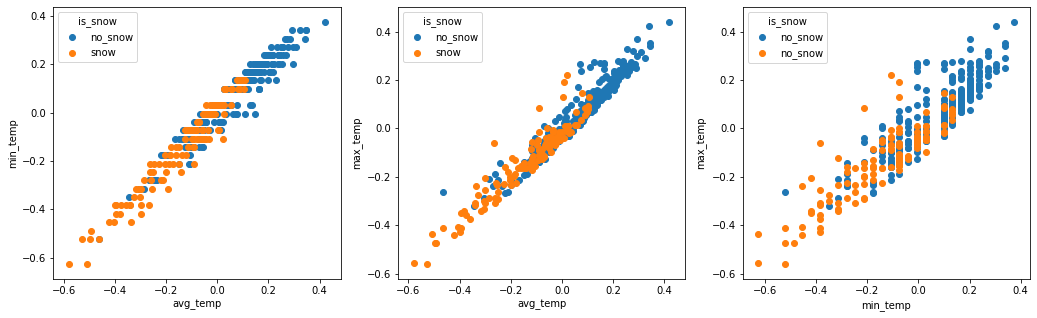

In [0]:
print('Визуализируем данные с использованием стандартизации на размах:\n')
fig, graphs = plt.subplots(1, 3, figsize=(17.5, 5))
plt.axes(graphs[0])
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['avg_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['min_temp'],
        label='no_snow',
        cmap='rainbow'
    )
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['avg_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['min_temp'],
        label='snow',
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('min_temp')
plt.legend(title='is_snow')

plt.axes(graphs[1])
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['avg_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['max_temp'],
        label='no_snow',
        cmap='rainbow'
    )
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['avg_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['max_temp'],
        label='snow',
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('max_temp')
plt.legend(title='is_snow')

plt.axes(graphs[2])
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['min_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] == 0]['max_temp'],
        label='no_snow',
        cmap='rainbow'
    )
plt.scatter(
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['min_temp'],
        amplitude_scoring[amplitude_scoring['snow_depth'] > 0]['max_temp'],
        label='no_snow',
        cmap='rainbow'
    )
plt.xlabel('min_temp')
plt.ylabel('max_temp')
plt.legend(title='is_snow')

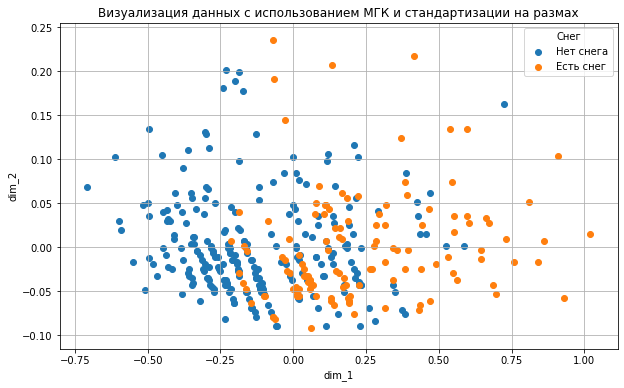

In [93]:
from sklearn.decomposition import PCA

pca_a = PCA(n_components = 2)
XPCAreduced = pca_a.fit_transform(amplitude_scoring[['avg_temp', 'min_temp', 'max_temp']].to_numpy())
a_s = pd.DataFrame(XPCAreduced, columns = ['col1', 'col2'])
a_s['snow_depth'] = df['snow_depth'].to_numpy()

fig, graph = plt.subplots(figsize=(10, 6))
plt.scatter(
        a_s[a_s['snow_depth'] == 0]['col1'],
        a_s[a_s['snow_depth'] == 0]['col2'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        a_s[a_s['snow_depth'] > 0]['col1'],
        a_s[a_s['snow_depth'] > 0]['col2'],
        label='Есть снег',
        cmap='rainbow'
    )
plt.title('Визуализация данных с использованием МГК и стандартизации на размах')
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.grid()
plt.legend(title='Снег')

print()

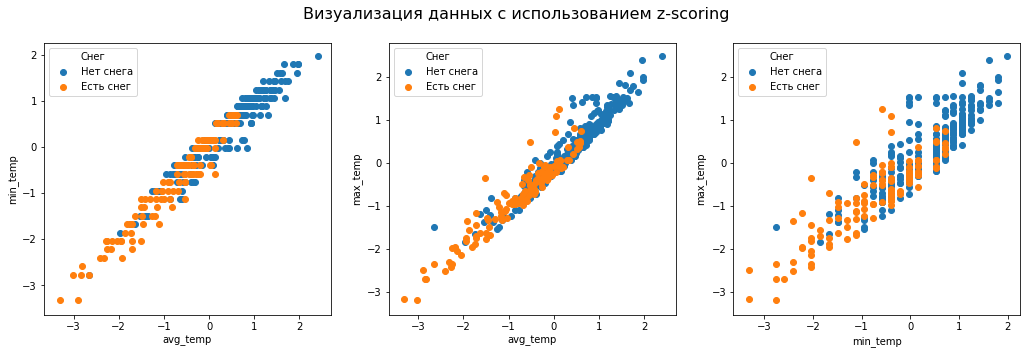

In [97]:
fig, graphs = plt.subplots(1, 3, figsize=(17.5, 5))
fig.suptitle('Визуализация данных с использованием z-scoring', fontsize=16)

plt.axes(graphs[0])
plt.scatter(
        z_scoring[z_scoring['snow_depth'] == 0]['avg_temp'],
        z_scoring[z_scoring['snow_depth'] == 0]['min_temp'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        z_scoring[z_scoring['snow_depth'] > 0]['avg_temp'],
        z_scoring[z_scoring['snow_depth'] > 0]['min_temp'],
        label='Есть снег',
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('min_temp')
plt.legend(title='Снег')

plt.axes(graphs[1])
plt.scatter(
        z_scoring[z_scoring['snow_depth'] == 0]['avg_temp'],
        z_scoring[z_scoring['snow_depth'] == 0]['max_temp'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        z_scoring[z_scoring['snow_depth'] > 0]['avg_temp'],
        z_scoring[z_scoring['snow_depth'] > 0]['max_temp'],
        label='Есть снег',
        cmap='rainbow'
    )
plt.xlabel('avg_temp')
plt.ylabel('max_temp')
plt.legend(title='Снег')

plt.axes(graphs[2])
plt.scatter(
        z_scoring[z_scoring['snow_depth'] == 0]['min_temp'],
        z_scoring[z_scoring['snow_depth'] == 0]['max_temp'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        z_scoring[z_scoring['snow_depth'] > 0]['min_temp'],
        z_scoring[z_scoring['snow_depth'] > 0]['max_temp'],
        label='Есть снег',
        cmap='rainbow'
    )
plt.xlabel('min_temp')
plt.ylabel('max_temp')
plt.legend(title='Снег')
fig.savefig('gdrive/My Drive/Colab Notebooks/task5_zscoring.png')

print()

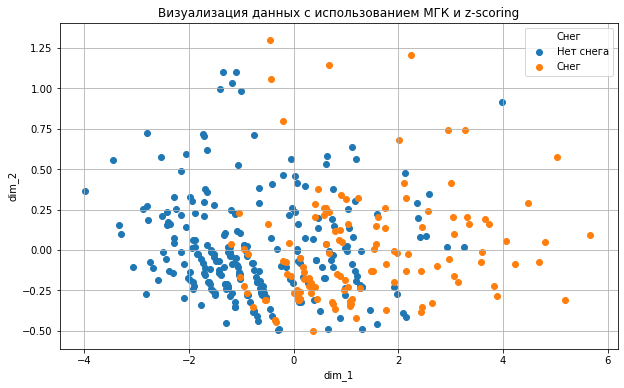

In [101]:
from sklearn.decomposition import PCA

pca_z = PCA(n_components = 2)
XPCAreduced = pca_z.fit_transform(z_scoring[['avg_temp', 'min_temp', 'max_temp']].to_numpy())
z_s = pd.DataFrame(XPCAreduced, columns = ['col1', 'col2'])
z_s['snow_depth'] = df['snow_depth'].to_numpy()

fig, graph = plt.subplots(figsize=(10, 6))
plt.scatter(
        z_s[z_s['snow_depth'] == 0]['col1'],
        z_s[z_s['snow_depth'] == 0]['col2'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        z_s[z_s['snow_depth'] > 0]['col1'],
        z_s[z_s['snow_depth'] > 0]['col2'],
        label='Снег',
        cmap='rainbow'
    )

plt.title('Визуализация данных с использованием МГК и z-scoring')
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.grid()
plt.legend(title='Снег')

print()

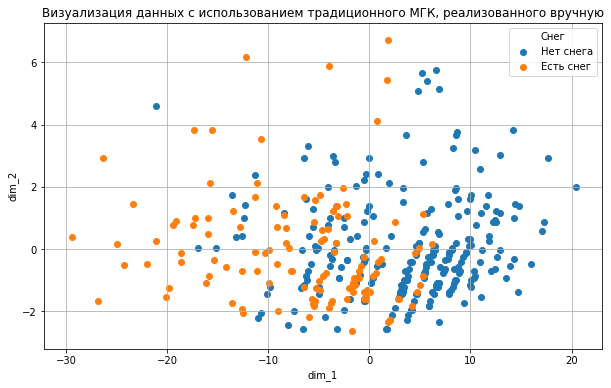

In [105]:
X = np.transpose(df[['avg_temp', 'min_temp', 'max_temp']].to_numpy())
Xcentered = (X[0] - X[0].mean(), X[1] - X[1].mean(), X[2] - X[2].mean())
m = (X[0].mean(), X[1].mean(), X[2].mean())
covmat = np.cov(Xcentered)
_, vecs = np.linalg.eig(covmat)
v = [vecs[:,0], vecs[:,2]]
Xnew = pd.DataFrame(np.transpose(np.dot(v,Xcentered)), columns = ['col1', 'col2'])
Xnew['snow_depth'] = df['snow_depth'].to_numpy()

fig, graph = plt.subplots(figsize=(10, 6))
plt.scatter(
        Xnew[Xnew['snow_depth'] == 0]['col1'],
        Xnew[Xnew['snow_depth'] == 0]['col2'],
        label='Нет снега',
        cmap='rainbow'
    )
plt.scatter(
        Xnew[Xnew['snow_depth'] > 0]['col1'],
        Xnew[Xnew['snow_depth'] > 0]['col2'],
        label='Есть снег',
        cmap='rainbow'
    )

plt.title('Визуализация данных с использованием традиционного МГК, реализованного вручную')
plt.legend(title='Снег')
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.grid()

print()

In [106]:
print ("Первая главная компонента: ", v[0], "\nВторая главная компонента: ", v[1])

Первая главная компонента:  [0.57942185 0.60603756 0.54496678] 
Вторая главная компонента:  [ 0.01553545 -0.67673907  0.73605902]


В первой главной компоненте коэффициенты почти равны, таким образом первая компонента это некий общий показатель температуры, на основе всех трёх температурных признаков.

Во второй главной компоненте коэффициент перед среднесуточной температурой практически равен 0, а коэффициенты перед минимальной и максимальной температурой почти равны по модулю и противоположны по знаку, значит это разность минимальной и максимальной температуры (домноженная на какой-то коэффициент), т.е. амплитуда колебания температуры в течении суток.

# Задание 6 - Линейная регрессия

 * По возможности, найдите два признака в Ваших данных с более или менее «линейным» полем рассеяния; представьте его на графике.
 * Постройте уравнение линейной регрессии одного из этих признаков через другой признак. Сделайте комментарий о смысле величины регрессионного коэффициента при этом другом признаке.
 * Найдите значения коэффициентов корреляции и детерминации; сделайте комментарий о смысле величины последнего.
 * Сделайте предсказание величины целевого признака на двух-трех объектах; прокомментируйте результат.
 * Рассчитайте среднюю относительную ошибку регрессионного уравнения на всех объектах Вашей таблицы данных и
сравните ее с величиной коэффициента детерминации.

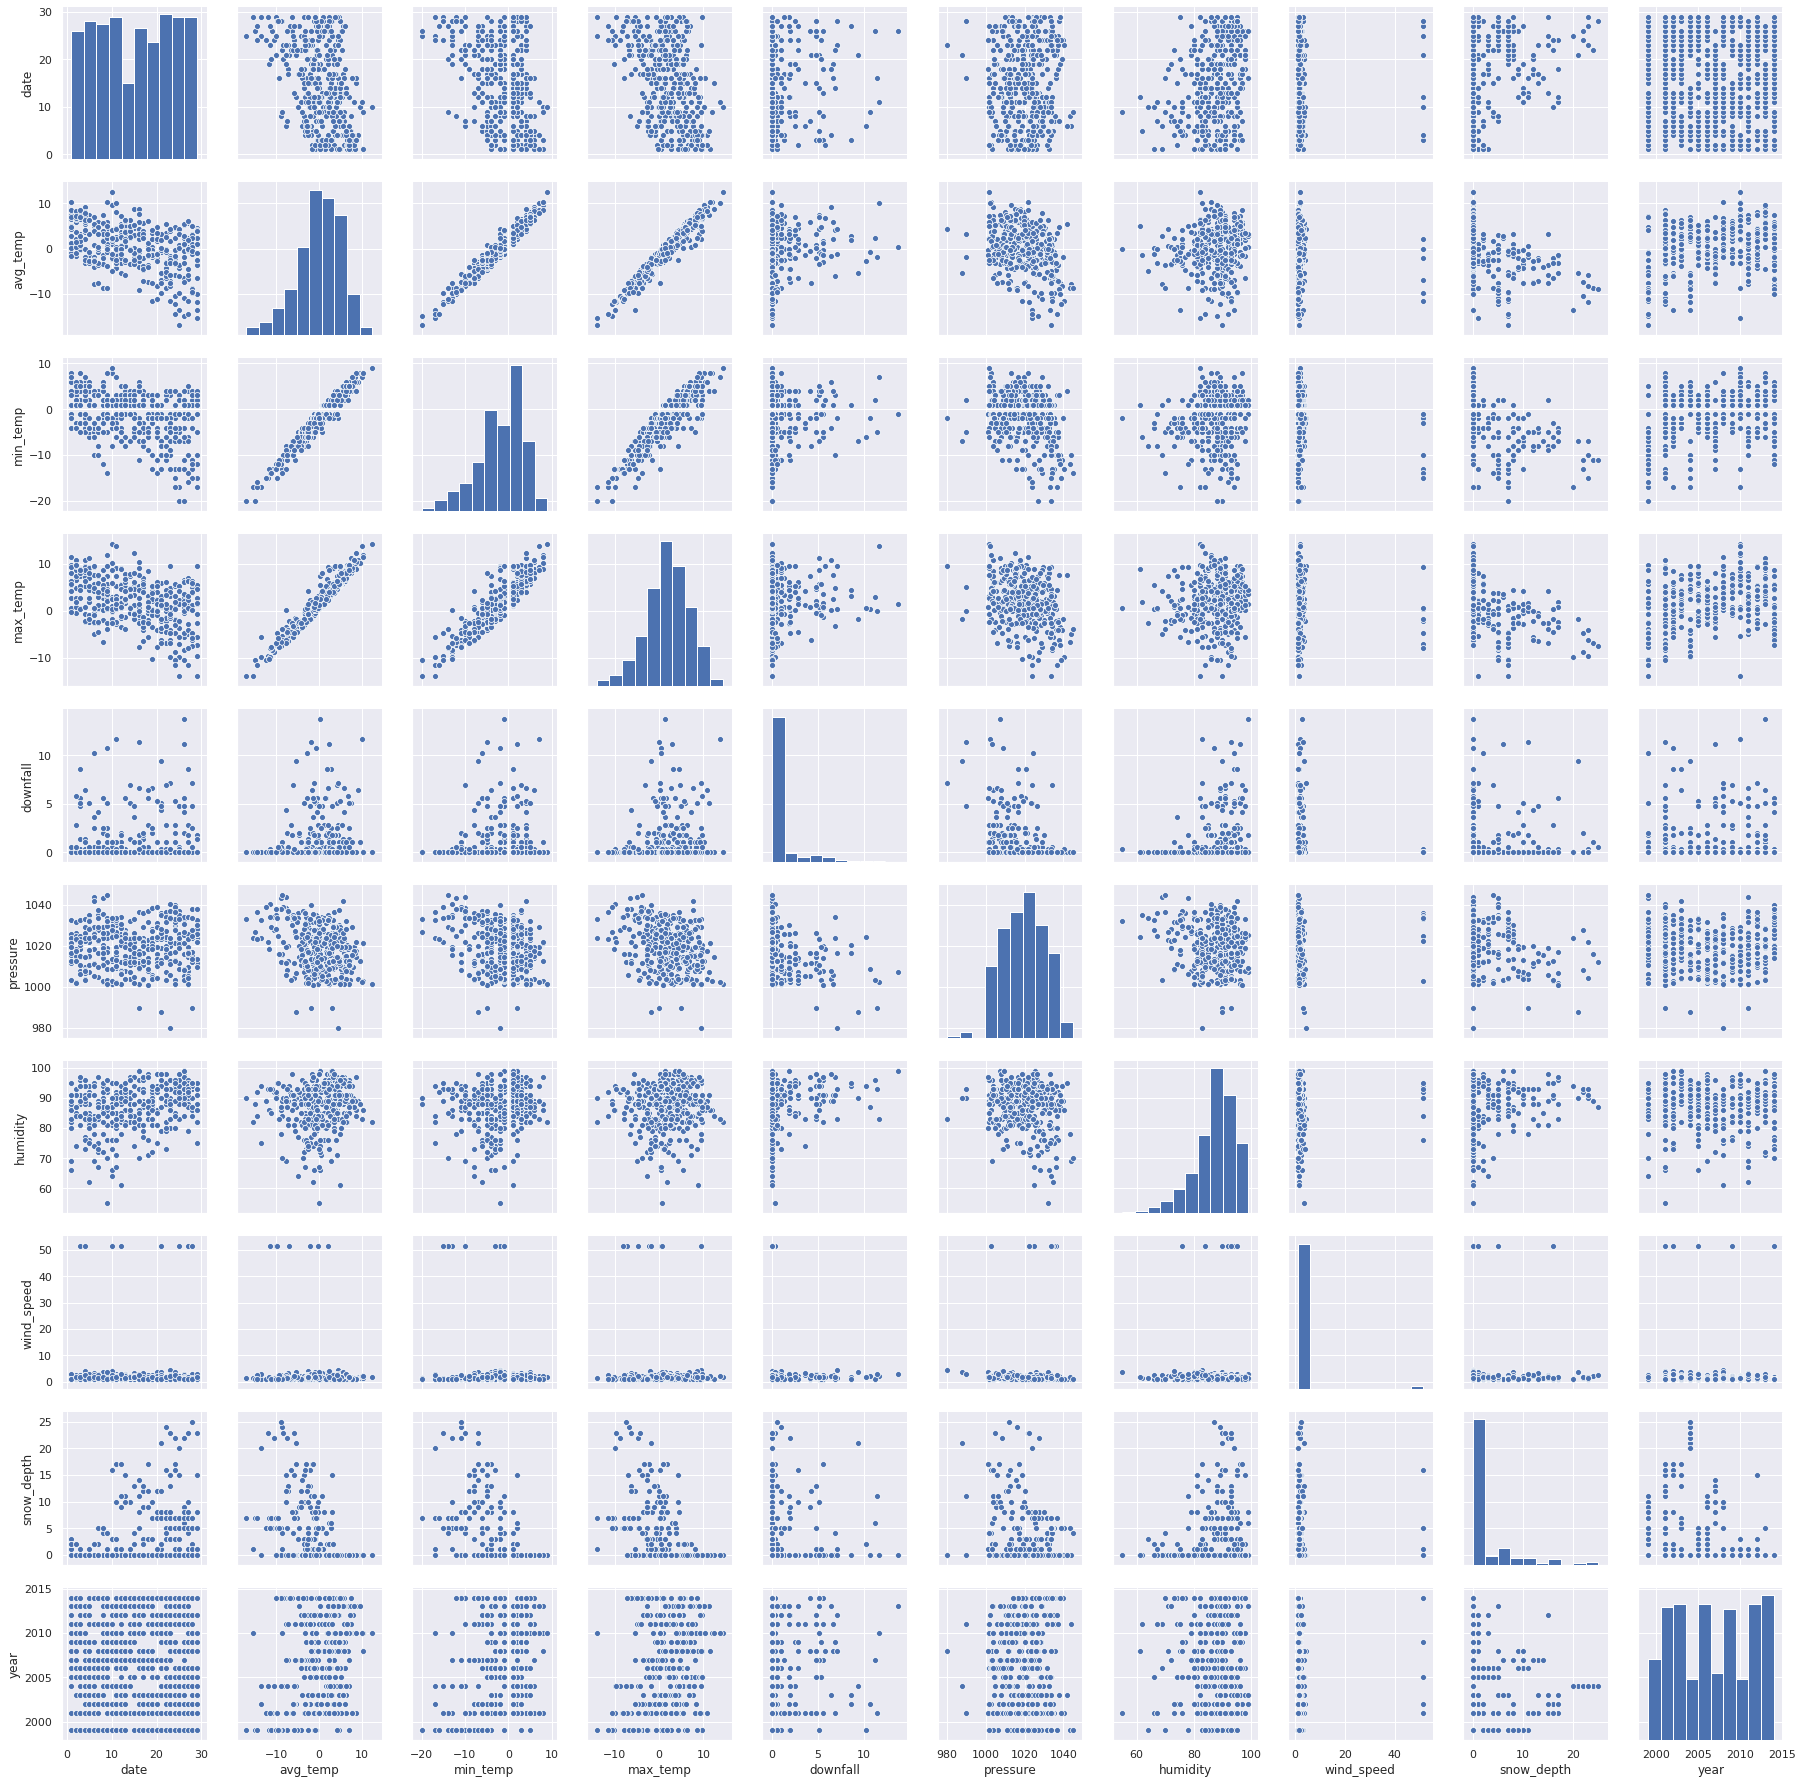

In [107]:
import seaborn as sns

sns.set()
cols = ['date','avg_temp','min_temp','max_temp','downfall','pressure','humidity','wind_speed','snow_depth','year']
sns.pairplot(df[cols])

fig = plt.gcf()
fig.savefig('gdrive/My Drive/Colab Notebooks/task6_pairplot.png')
print()

Более остальных на линейное поле рассеивания похоже поле рассеивания признаков `date` и `avg_temp`

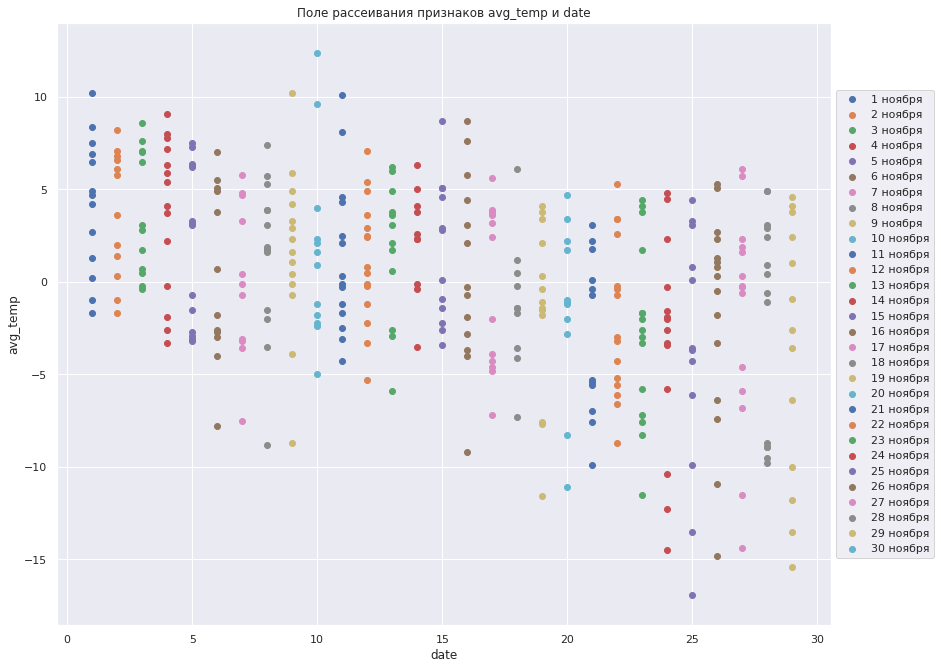

In [110]:
fig, graph = plt.subplots(figsize=(13, 9))
for i in range(1, 31):
  plt.scatter(
        df[df.date == i].date,
        df[df.date == i].avg_temp,
        label=f'{i} ноября',
        cmap='rainbow'
    )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title('Поле рассеивания признаков avg_temp и date')
plt.xlabel('date')
plt.ylabel('avg_temp')

fig.savefig('gdrive/My Drive/Colab Notebooks/task6_scatter_plot.png')

print()

Обучим линейную регрессию:
 * `date` - признак
 * `avg_temp` - целевое значение

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(df['date'])[:,np.newaxis], np.array(df['avg_temp'])[:,np.newaxis])

print(f'Уравнение линейной регрессии имеет вид:\ty = {model.coef_.item()} * x + {model.intercept_.item()}')

Уравнение линейной регрессии имеет вид:	y = -0.2550634686459896 * x + 3.9509900360879273


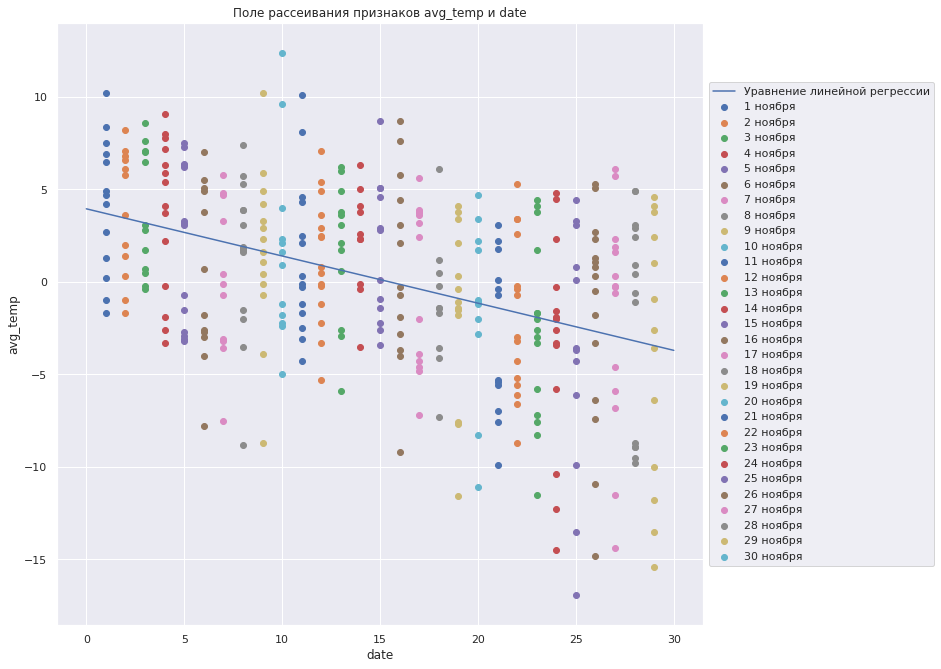

In [113]:
fig, graph = plt.subplots(figsize=(13, 9))
for i in range(1, 31):
  plt.scatter(
        df[df.date == i].date,
        df[df.date == i].avg_temp,
        label=f'{i} ноября',
        cmap='rainbow'
    )

x = np.linspace(0,30)
y = model.coef_.item()*x + model.intercept_.item()
plt.plot(x, y, label='Уравнение линейной регрессии')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title('Поле рассеивания признаков avg_temp и date')
plt.xlabel('date')
plt.ylabel('avg_temp')

fig.savefig('gdrive/My Drive/Colab Notebooks/task6_scatter_plot.png')

print()

In [115]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

corr = pearsonr(model.coef_.item()*df['date'] + model.intercept_.item(), df['avg_temp'])[0]
r2 = r2_score(df['avg_temp'], model.coef_.item()*df['date'] + model.intercept_.item())

print(f'Значение коэффициента корреляции Пирсона:\t{corr}')
print(f'Значение коэффициента детерминации:\t\t{r2}')

Значение коэффициента корреляции Пирсона:	0.4204443991275562
Значение коэффициента детерминации:		0.1767734927577317


Сделаем интересное наблюдение, а именно - проверим, какую погоду температуру модель на нескольких числах ноября и сравним её с действительной за окном;

In [0]:
print(f'''
1 ноября 2019\tСредняя дневная температура (по Яндекс.Погода): -0.5˙\tПредсказание:\t{model.predict(np.array([1])[:,np.newaxis]).item()}˙
8 ноября 2019\tСредняя дневная температура (по Яндекс.Погода): +3˙\tПредсказание:\t{model.predict(np.array([8])[:,np.newaxis]).item()}˙
15 ноября 2019\tСредняя дневная температура (по Яндекс.Погода): +3.5˙\tПредсказание:\t{model.predict(np.array([15])[:,np.newaxis]).item()}˙
22 ноября 2019\tСредняя дневная температура (по Яндекс.Погода): -3.5˙\tПредсказание:\t{model.predict(np.array([22])[:,np.newaxis]).item()}
''')


1 ноября 2019	Средняя дневная температура (по Яндекс.Погода): -0.5˙	Предсказание:	3.695926567441938˙
8 ноября 2019	Средняя дневная температура (по Яндекс.Погода): +3˙	Предсказание:	1.9104822869200104˙
15 ноября 2019	Средняя дневная температура (по Яндекс.Погода): +3.5˙	Предсказание:	0.12503800639808293˙
22 ноября 2019	Средняя дневная температура (по Яндекс.Погода): -3.5˙	Предсказание:	-1.6604062741238446



Не то, чтобы прямо точно, но мы и не синоптики в конце концов. А по данным модели, в целом, тренд прослеживается, и примерно понятно, когда стоит надеть свитер :)

In [116]:
tmp = df[['date', 'avg_temp']]
tmp['avg_temp_predict'] = tmp.apply(lambda x: x.date * model.coef_.item() + model.intercept_.item(), axis=1)
tmp['diff_percentage'] = tmp.apply(lambda x: abs((x.avg_temp - x.avg_temp_predict) * 100.0 / x.avg_temp), axis=1)
print(f'Значение средней относительной ошибки: {tmp.diff_percentage.mean()}%')

Значение средней относительной ошибки: 175.4859768883784%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
